# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

NUM_TESTS_NQ2 = 0
NUM_TESTS_NW2 = 0
NUM_TESTS_QW2 = 1

NUM_TESTS_NQ3 = 0
NUM_TESTS_NW3 = 0
NUM_TESTS_QW3 = 30

T2_S_NQ = []
T3_S_NQ = []
T2_S_NW = []
T3_S_NW = []
T2_S_QW = []
T3_S_QW = []
T2_R_NQ = []
T3_R_NQ = []
T2_R_NW = []
T3_R_NW = []
T2_R_QW = []
T3_R_QW = []


for i in range(1,NUM_TESTS_NQ2+1):
  T2_S_NQ.append(os.path.join('Table2NoQueue', 'table2SendNoQueueTest'+str(i)+'.log'))
  T2_R_NQ.append(os.path.join('Table2NoQueue', 'table2ReceiveNoQueueTest'+str(i)+'.log'))

for i in range(1,NUM_TESTS_NW2+1):
  T2_S_NW.append(os.path.join('Table2NoWeight', 'table2SendNoWeightTest'+str(i)+'.log'))
  T2_R_NW.append(os.path.join('Table2NoWeight', 'table2ReceiveNoWeightTest'+str(i)+'.log'))

for i in range(1,NUM_TESTS_QW2+1):
  T2_S_QW.append(os.path.join('Table2WithWeight', 'table2SendWithWeightTest'+str(i)+'.log'))
  T2_R_QW.append(os.path.join('Table2WithWeight', 'table2ReceiveWithWeightTest'+str(i)+'.log'))

for i in range(1,NUM_TESTS_NQ3+1):
  T3_S_NQ.append(os.path.join('Table3NoQueue', 'table3SendNoQueueTest'+str(i)+'.log'))
  T3_R_NQ.append(os.path.join('Table3NoQueue', 'table3ReceiveNoQueueTest'+str(i)+'.log'))

for i in range(1,NUM_TESTS_NW3+1):
  T3_S_NW.append(os.path.join('Table3NoWeight', 'table3SendNoWeightTest'+str(i)+'.log'))
  T3_R_NW.append(os.path.join('Table3NoWeight', 'table3ReceiveNoWeightTest'+str(i)+'.log'))

for i in range(1,NUM_TESTS_QW3+1):
  T3_S_QW.append(os.path.join('Table3WithWeight', 'table3SendWithWeightTest'+str(i)+'.log'))
  T3_R_QW.append(os.path.join('Table3WithWeight', 'table3ReceiveWithWeightTest'+str(i)+'.log'))

TEMP_PATH = os.path.join('TEMP')

In [3]:
!pip install dpkt

In [4]:
import struct
import dpkt
import matplotlib.pyplot as plt
import pandas
import numpy as np
import json

# Execução

## Contar numero de pacotes em cada arquivo pcap

In [ ]:
for j in range(NUM_TESTS_NQ2):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T2_R_NQ[j],'rb')):
    i += 1
  print("T2_R_NQ["+str(j)+"] = "+str(i))

for j in range(NUM_TESTS_NQ2):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T2_S_NQ[j],'rb')):
    i += 1
  print("T2_S_NQ["+str(j)+"] = "+str(i))

In [ ]:
for j in range(NUM_TESTS_NW2):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T2_R_NW[j],'rb')):
    i += 1
  print("T2_R_NW["+str(j)+"] = "+str(i))

for j in range(NUM_TESTS_NW2):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T2_S_NW[j],'rb')):
    i += 1
  print("T2_S_NW["+str(j)+"] = "+str(i))

In [ ]:
for j in range(NUM_TESTS_QW2):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T2_R_QW[j],'rb')):
    i += 1
    #print(ts)
  print("T2_R_QW["+str(j)+"] = "+str(i))

for j in range(NUM_TESTS_QW2):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T2_S_QW[j],'rb')):
    i += 1
  print("T2_S_QW["+str(j)+"] = "+str(i))

In [ ]:
for j in range(NUM_TESTS_NQ3):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T3_R_NQ[j],'rb')):
    i += 1
  print("T3_R_NQ["+str(j)+"] = "+str(i))

for j in range(NUM_TESTS_NQ3):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T3_S_NQ[j],'rb')):
    i += 1
  print("T3_S_NQ["+str(j)+"] = "+str(i))

In [ ]:
for j in range(NUM_TESTS_NW3):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T3_R_NW[j],'rb')):
    i += 1
  print("T3_R_NW["+str(j)+"] = "+str(i))

for j in range(NUM_TESTS_NW3):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T3_S_NW[j],'rb')):
    i += 1
  print("T3_S_NW["+str(j)+"] = "+str(i))

In [ ]:
for j in range(NUM_TESTS_QW3):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T3_R_QW[j],'rb')):
    i += 1
  print("T3_R_QW["+str(j)+"] = "+str(i))

for j in range(NUM_TESTS_QW3):
  i = 0
  for ts, payload in dpkt.pcap.Reader(open(T3_S_QW[j],'rb')):
    i += 1
  print("T3_S_QW["+str(j)+"] = "+str(i))

## Calculos

In [ ]:
timestamps = []
for i in range(NUM_TESTS_NQ2):
  for S, R in zip(dpkt.pcap.Reader(open(T2_S_NQ[i],'rb')), dpkt.pcap.Reader(open(T2_R_NQ[i],'rb'))):
    timestamps.append(R[0] - S[0])
  with open(TEMP_PATH+"/T2_NQ"+str(i), "w") as fp:
    json.dump(timestamps, fp)
    print("Resultados salvos no TEMP/T2_NQ"+str(i))
  print("Media: " +str(sum(timestamps)/len(timestamps)))
  timestamps.clear()

In [ ]:
timestamps = []
for i in range(NUM_TESTS_NW2):
  for S, R in zip(dpkt.pcap.Reader(open(T2_S_NW[i],'rb')), dpkt.pcap.Reader(open(T2_R_NW[i],'rb'))):
    timestamps.append(R[0] - S[0])
  with open(TEMP_PATH+"/T2_NW"+str(i), "w") as fp:
    json.dump(timestamps, fp)
    print("Resultados salvos no TEMP/T2_NW"+str(i))
  print("Media: " +str(sum(timestamps)/len(timestamps)))
  timestamps.clear()

In [5]:
#timestamps = []
sendId = {}
receiveId = {}
for i in range(NUM_TESTS_QW2):
    for S, R in zip(dpkt.pcap.Reader(open(T2_S_QW[i],'rb')), dpkt.pcap.Reader(open(T2_R_QW[i],'rb'))):
        #print(S[1][47:52])
        #print(R[1][47:52])
        if(not (S[1][47:52]).decode('ascii') in sendId):
            sendId[(S[1][47:52]).decode('ascii')] = []
        if(not (R[1][47:52]).decode('ascii') in receiveId):
            receiveId[(R[1][47:52]).decode('ascii')] = []

        sendId[(S[1][47:52]).decode('ascii')].append(S[0])
        receiveId[(R[1][47:52]).decode('ascii')].append(R[0])

        #timestamps.append(R[0] - S[0])
    temp = {key: np.subtract(receiveId[key], sendId.get(key, 0)) for key in receiveId}
    
    #interPacket = {key: np.subtract(receiveId[key][1:], receiveId[key][0:-1]) for key in receiveId}

    timestamps2 = []
    for j in temp:
        timestamps2.extend(temp[j])

    #for j in interPacket:
    #    if max(interPacket[j]) > 0.001:
    #        print(max(interPacket[j]))
    #        print(str(j)+"   "+"Interpacket violado")
        
    with open(TEMP_PATH+"/T2_QW"+str(i), "w") as fp:
        json.dump(timestamps2, fp)
        print("Resultados salvos no TEMP/T2_QW"+str(i))
    #print("Media: " +str(sum(timestamps)/len(timestamps)))
    print("Media2: " +str(sum(timestamps2)/len(timestamps2)))
    #timestamps.clear()
    timestamps2.clear()
    for j in sendId:
        sendId[j].clear()
        receiveId[j].clear()
    sendId.clear()
    receiveId.clear()

Resultados salvos no TEMP/T2_QW0
Media2: -0.13053975681591842


In [ ]:
timestamps = []
for i in range(NUM_TESTS_NQ3):
  for S, R in zip(dpkt.pcap.Reader(open(T3_S_NQ[i],'rb')), dpkt.pcap.Reader(open(T3_R_NQ[i],'rb'))):
    timestamps.append(R[0] - S[0])
  with open(TEMP_PATH+"/T3_NQ"+str(i), "w") as fp:
    json.dump(timestamps, fp)
    print("Resultados salvos no TEMP/T3_NQ"+str(i))
  print("Media: " +str(sum(timestamps)/len(timestamps)))
  timestamps.clear()

In [ ]:
timestamps = []
for i in range(NUM_TESTS_NW3):
  for S, R in zip(dpkt.pcap.Reader(open(T3_S_NW[i],'rb')), dpkt.pcap.Reader(open(T3_R_NW[i],'rb'))):
    timestamps.append(R[0] - S[0])
  with open(TEMP_PATH+"/T3_NW"+str(i), "w") as fp:
    json.dump(timestamps, fp)
    print("Resultados salvos no TEMP/T3_NW"+str(i))
  print("Media: " +str(sum(timestamps)/len(timestamps)))
  timestamps.clear()

In [ ]:
timestamps = []
for i in range(NUM_TESTS_QW3):
  for S, R in zip(dpkt.pcap.Reader(open(T3_S_QW[i],'rb')), dpkt.pcap.Reader(open(T3_R_QW[i],'rb'))):
    timestamps.append(R[0] - S[0])
  with open(TEMP_PATH+"/T3_QW"+str(i), "w") as fp:
    json.dump(timestamps, fp)
    print("Resultados salvos no TEMP/T3_QW"+str(i))
  print("Media: " +str(sum(timestamps)/len(timestamps)))
  timestamps.clear()

# Graficos

In [ ]:
fig, ax = plt.subplots(3, sharex='col', sharey='row')
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i in range(NUM_TESTS_NQ2):
  with open(TEMP_PATH+"/T2_NQ"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      ax[0].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[0].title.set_text("Table2 no Queue")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[0].axhline(0.001, color='r')

for i in range(NUM_TESTS_NW2):
  with open(TEMP_PATH+"/T2_NW"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      ax[1].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[1].title.set_text("Table2 with queue, no weight ")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[1].axhline(0.001, color='r')

for i in range(NUM_TESTS_QW2):
  with open(TEMP_PATH+"/T2_QW"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      ax[2].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[2].title.set_text("Table2 with queue and weight")
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[2].axhline(0.001, color='r')

In [ ]:
fig, ax = plt.subplots(3, sharex='col', sharey='row')
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i in range(NUM_TESTS_NQ2):
  with open(TEMP_PATH+"/T2_NQ"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      timestamps.sort()
      ax[0].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[0].set_xlim(1178000,1180000)
ax[0].title.set_text("Table2 no Queue, worst 2000")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[0].axhline(0.001, color='r')

for i in range(NUM_TESTS_NW2):
  with open(TEMP_PATH+"/T2_NW"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      timestamps.sort()
      ax[1].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[1].set_xlim(1178000,1180000)
ax[1].title.set_text("Table2 with queue, no weight, worst 2000 ")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[1].axhline(0.001, color='r')

for i in range(NUM_TESTS_QW2):
  with open(TEMP_PATH+"/T2_QW"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      timestamps.sort()
      ax[2].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[2].set_xlim(1178000,1180000)
ax[2].title.set_text("Table2 with queue and weight, worst 2000")
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[2].axhline(0.001, color='r')


max test0: -0.12958312034606934
min test0: -0.13064312934875488


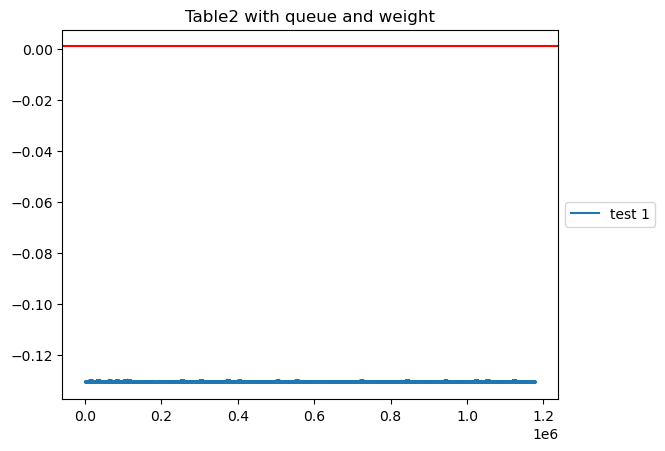

In [7]:
for i in range(NUM_TESTS_QW2):
  with open(TEMP_PATH+"/T2_QW"+str(i), 'rb') as fp:
        timestamps = json.load(fp)
        print("max test"+str(i)+": "+str(max(timestamps)))
        print("min test"+str(i)+": "+str(min(timestamps)))
        #plt.plot(timestamps)
        #timestamps.sort()
        plt.plot(timestamps, label='test '+str(i+1))
plt.title("Table2 with queue and weight")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
        #plt.xlim(1179995,1180000)
       # print(sum(timestamps)/len(timestamps))
plt.axhline(0.001, color='r')

In [ ]:
for i in range(NUM_TESTS_QW2):
  with open(TEMP_PATH+"/T2_QW"+str(i), 'rb') as fp:
        timestamps = json.load(fp)
        #print(max(timestamps))
        #print(min(timestamps))
        #plt.plot(timestamps)
        timestamps.sort()
        plt.plot(timestamps, label='test '+str(i+1))
        plt.xlim(1175000,1180000)
        #print(sum(timestamps)/len(timestamps))
plt.title("Table2 with queue and weight")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
plt.axhline(0.001, color='r')

# Tabela 3

In [ ]:
fig, ax = plt.subplots(3, sharex='col', sharey='row')
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i in range(NUM_TESTS_NQ3):
  with open(TEMP_PATH+"/T3_NQ"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      ax[0].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[0].title.set_text("Table3 no Queue")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[0].axhline(0.001, color='r')

for i in range(NUM_TESTS_NW3):
  with open(TEMP_PATH+"/T3_NW"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      ax[1].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[1].title.set_text("Table3 with queue, no weight ")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[1].axhline(0.001, color='r')

for i in range(NUM_TESTS_QW3):
  with open(TEMP_PATH+"/T3_QW"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      ax[2].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[2].title.set_text("Table3 with queue and weight")
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[2].axhline(0.001, color='r')

In [ ]:
fig, ax = plt.subplots(3, sharex='col', sharey='row')
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for i in range(NUM_TESTS_NQ3):
  with open(TEMP_PATH+"/T3_NQ"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      timestamps.sort()
      ax[0].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[0].set_xlim(1168000,1170000)
ax[0].title.set_text("Table3 no Queue")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[0].axhline(0.001, color='r')

for i in range(NUM_TESTS_NW3):
  with open(TEMP_PATH+"/T3_NW"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      timestamps.sort()
      ax[1].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[0].set_xlim(1168000,1170000)
ax[1].title.set_text("Table3 with queue, no weight")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[1].axhline(0.001, color='r')

for i in range(NUM_TESTS_QW3):
  with open(TEMP_PATH+"/T3_QW"+str(i), 'rb') as fp:
      timestamps = json.load(fp)
      timestamps.sort()
      ax[2].plot(timestamps, label='test '+str(i+1))
      timestamps.clear()
ax[0].set_xlim(1168000,1170000)
ax[2].title.set_text("Table3 with queue and weight")
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
ax[2].axhline(0.001, color='r')

In [6]:
for i in range(NUM_TESTS_QW3):
  with open(TEMP_PATH+"/T3_QW"+str(i), 'rb') as fp:
        timestamps = json.load(fp)
        print("max test"+str(i)+": "+max(timestamps))
        print("min test"+str(i)+": "+min(timestamps))
        #plt.plot(timestamps)
        #timestamps.sort()
        plt.plot(timestamps, label='test '+str(i+1))
plt.title("Table3 with queue and weight")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
        #plt.xlim(1179995,1180000)
       # print(sum(timestamps)/len(timestamps))
plt.axhline(0.001, color='r')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2124530318.py, line 5)

In [ ]:
for i in range(NUM_TESTS_QW3):
  with open(TEMP_PATH+"/T3_QW"+str(i), 'rb') as fp:
        timestamps = json.load(fp)
        #print(max(timestamps))
        #print(min(timestamps))
        #plt.plot(timestamps)
        timestamps.sort()
        plt.plot(timestamps, label='test '+str(i+1))
plt.title("Table3 with queue and weight")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)
        #plt.xlim(1179995,1180000)
       # print(sum(timestamps)/len(timestamps))
plt.axhline(0.001, color='r')